# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\32465\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1890'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [10]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [7]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [8]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\32465\Desktop\corpus\tac\tac_venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# Détail de la matrice
tfidf_vectors

<900x3193 sparse matrix of type '<class 'numpy.float64'>'
	with 580911 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

janvier      0.339849
contenant    0.321379
notaire      0.297908
1890         0.237002
are          0.229627
               ...   
empêcher     0.000000
en-          0.000000
endroit      0.000000
enf          0.000000
♦            0.000000
Length: 3193, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [60]:
cosine([1, 2, 3], [1, 2, 3])

0

In [23]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [24]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [61]:
tfidf_array = tfidf_vectors.toarray()

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [48]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [49]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [50]:
clusters = km_model.fit_predict(tfidf_vectors)

c:\Users\32465\Desktop\corpus\tac\tac_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [52]:
pprint(dict(clustering))

{0: ['KB_JB838_1890-01-06_01-00003.txt',
     'KB_JB838_1890-01-08_01-00003.txt',
     'KB_JB838_1890-01-09_01-00003.txt',
     'KB_JB838_1890-01-24_01-00003.txt',
     'KB_JB838_1890-03-09_01-00007.txt',
     'KB_JB838_1890-04-05_01-00003.txt',
     'KB_JB838_1890-04-06_01-00002.txt',
     'KB_JB838_1890-04-15_01-00003.txt',
     'KB_JB838_1890-05-08_01-00003.txt',
     'KB_JB838_1890-05-10_01-00003.txt',
     'KB_JB838_1890-07-09_01-00003.txt',
     'KB_JB838_1890-11-07_01-00003.txt',
     'KB_JB838_1890-11-14_01-00003.txt',
     'KB_JB838_1890-12-06_01-00003.txt',
     'KB_JB838_1890-12-14_01-00003.txt',
     'KB_JB838_1890-12-15_01-00003.txt',
     'KB_JB838_1891-02-06_01-00003.txt',
     'KB_JB838_1891-02-20_01-00003.txt',
     'KB_JB838_1891-04-08_01-00003.txt',
     'KB_JB838_1891-05-02_01-00003.txt',
     'KB_JB838_1891-05-05_01-00003.txt',
     'KB_JB838_1891-05-21_01-00003.txt',
     'KB_JB838_1891-05-24_01-00002.txt',
     'KB_JB838_1891-05-30_01-00003.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [62]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [54]:
reduced_vectors[:10]

array([[-0.07195419,  0.58611786],
       [ 0.12136995,  0.44955102],
       [-0.09542315,  0.19914176],
       [-0.09940013,  0.19353148],
       [-0.07095077,  0.57601144],
       [-0.21615768, -0.1172337 ],
       [-0.23446547, -0.06665951],
       [-0.18188925, -0.08459198],
       [-0.10325288,  0.17845108],
       [-0.25733695, -0.18825285]])

### Générer le plot

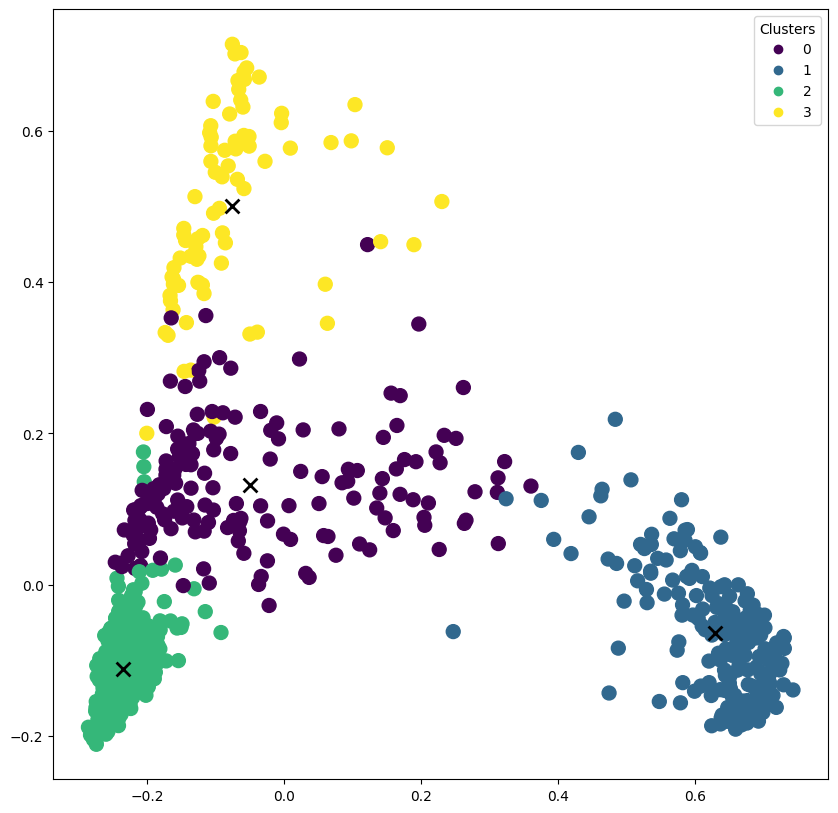

In [63]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assigner chaque document à son cluster correspondant
clustered_texts = {}
for cluster_idx, doc in zip(clusters, texts):
    if cluster_idx not in clustered_texts:
        clustered_texts[cluster_idx] = [doc]
    else:
        clustered_texts[cluster_idx].append(doc)

# Pour chaque cluster, extraire les mots-clés les plus fréquents à partir des documents associés
keywords_per_cluster = {}
for cluster_idx, docs in clustered_texts.items():
    # Concaténer les documents du cluster
    cluster_text = ' '.join(docs)

    # Vectorisation TF-IDF pour extraire les mots-clés
    tfidf_vectorizer_cluster = TfidfVectorizer()
    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform([cluster_text])

    # Obtention des mots-clés à partir des vecteurs TF-IDF
    feature_names_cluster = tfidf_vectorizer_cluster.get_feature_names_out()
    feature_array_cluster = np.array(feature_names_cluster)
    tfidf_sorting_cluster = np.argsort(tfidf_matrix_cluster.toarray()).flatten()[::-1]
    keywords = feature_array_cluster[tfidf_sorting_cluster][:10]  # Choisissez le nombre de mots-clés à extraire

    keywords_per_cluster[cluster_idx] = keywords.tolist()

# Sauvegarde des mots-clés par cluster dans un fichier texte
with open('keywords_per_cluster.txt', 'w') as file:
    for cluster_idx, keywords in keywords_per_cluster.items():
        file.write(f"Cluster {cluster_idx} Keywords: {', '.join(keywords)}\n")

Silhouette Score moyen : 0.6630798899472603


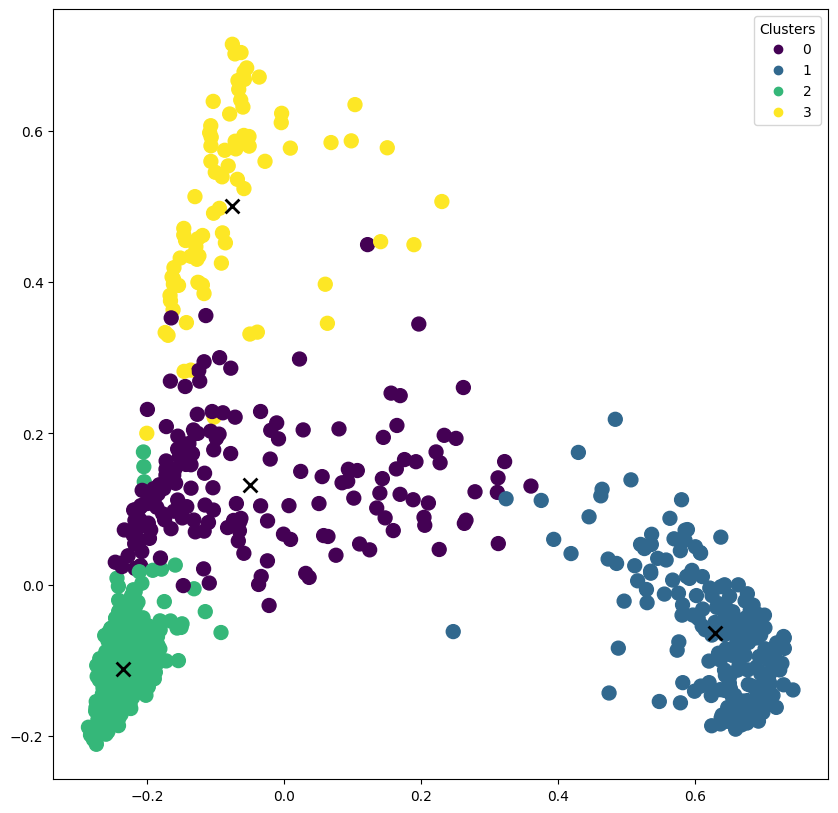

In [58]:
from sklearn.metrics import silhouette_score

# Supposons que reduced_vectors est votre ensemble de données réduites après PCA, et clusters contient les labels de clusters attribués à chaque point

# Calcul du score de silhouette
silhouette_avg = silhouette_score(reduced_vectors, clusters)
print(f"Silhouette Score moyen : {silhouette_avg}")

# Visualisation des données réduites avec les clusters et les centroïdes
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Supposons que 'clustered_texts' est une liste de clusters où chaque cluster contient des documents similaires
for cluster_idx, cluster_text in clustered_texts.items():
    # Convertir le cluster de texte en une matrice TF-IDF (exemple)
    tfidf_vectorizer_cluster = TfidfVectorizer()
    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(cluster_text)

    # Calculer la similarité entre les documents dans le cluster
    similarity_matrix = cosine_similarity(tfidf_matrix_cluster, tfidf_matrix_cluster)
    mean_similarity = similarity_matrix.mean()  # Similarité moyenne dans le cluster
    print(f"Similarité moyenne intra-cluster pour le cluster {cluster_idx} : {mean_similarity}")

Similarité moyenne intra-cluster pour le cluster 3 : 0.6644536450942955
Similarité moyenne intra-cluster pour le cluster 0 : 0.6175551176092248
Similarité moyenne intra-cluster pour le cluster 2 : 0.6445221609217825
Similarité moyenne intra-cluster pour le cluster 1 : 0.5921534333322923
